In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
df = pd.read_csv('commits_report_analysis_total.csv')

In [ ]:
df['effort'] = pd.to_numeric(df['effort'].str.replace('min', '').str.strip(), errors='coerce')
df['debt'] = pd.to_numeric(df['debt'].str.replace('min', '').str.strip(), errors='coerce')


<ipython-input-4-233b2f38cbb6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='severity', y='fix_duration', data=severity_duration, palette='muted')


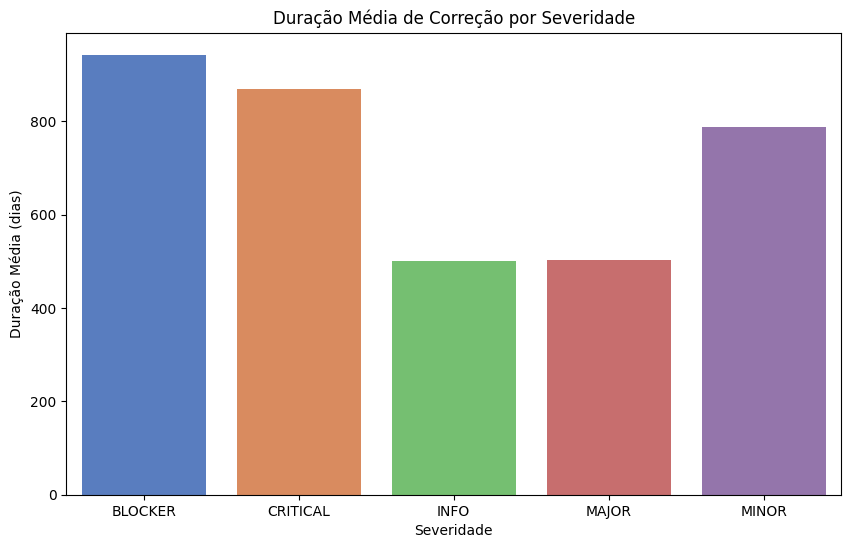

In [ ]:


df['fix_duration'] = pd.to_numeric(df['fix_duration'], errors='coerce')

severity_duration = df.groupby('severity')['fix_duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='severity', y='fix_duration', data=severity_duration, palette='muted')
plt.title('Duração Média de Correção por Severidade')
plt.xlabel('Severidade')
plt.ylabel('Duração Média (dias)')
plt.show()


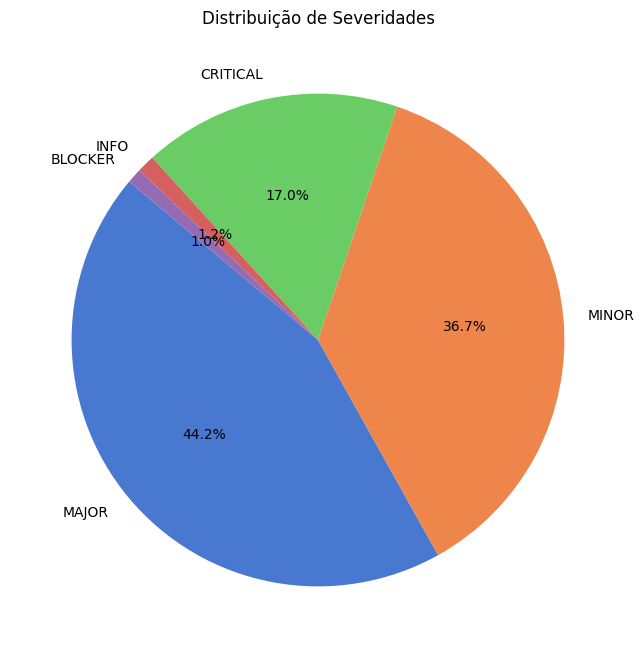

In [ ]:
severity_counts = df['severity'].value_counts().reset_index()

severity_counts.columns = ['severity', 'count']

plt.figure(figsize=(8, 8))
plt.pie(severity_counts['count'], labels=severity_counts['severity'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('Distribuição de Severidades')
plt.savefig("severidade.png", transparent=True)

plt.show()

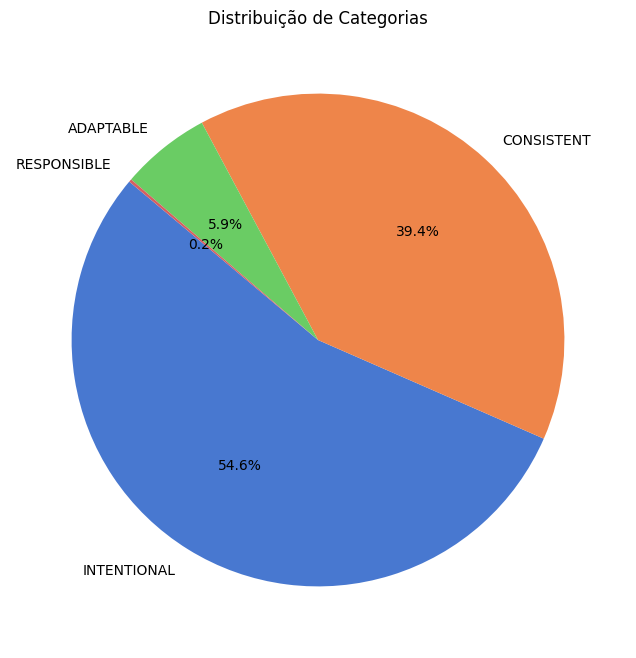

In [ ]:
severity_counts = df['clean_code_attributeCategory'].value_counts().reset_index()

severity_counts.columns = ['clean_code_attributeCategory', 'count']

plt.figure(figsize=(8, 8))
plt.pie(severity_counts['count'], labels=severity_counts['clean_code_attributeCategory'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('Distribuição de Categorias')
plt.savefig("categorias.png", transparent=True)
plt.show()


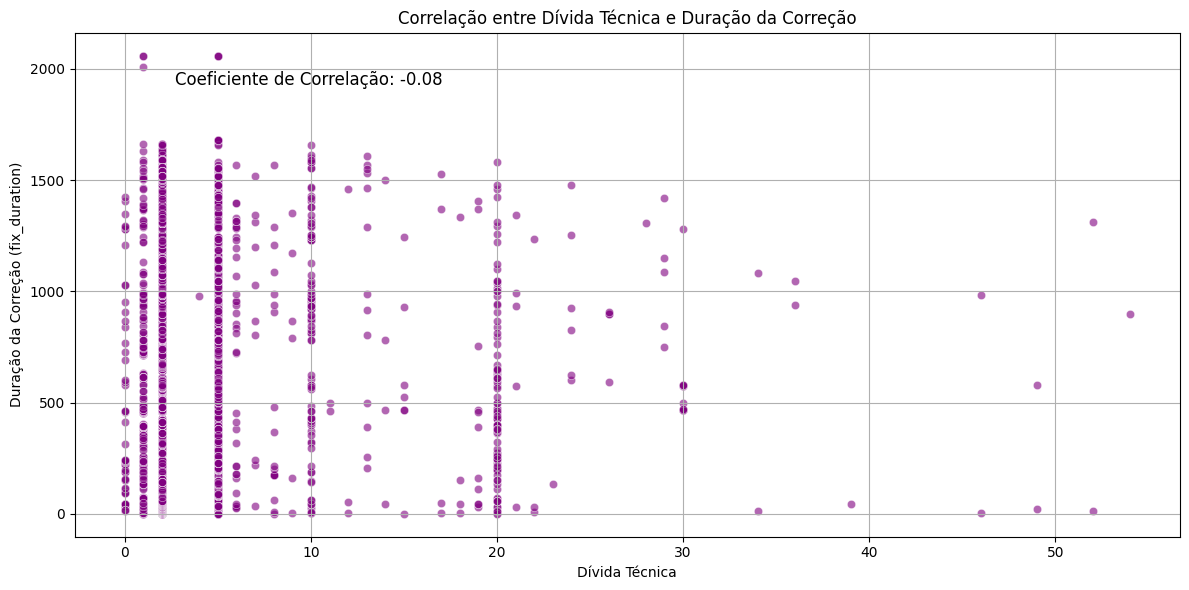

In [ ]:
df['fix_duration'] = pd.to_numeric(df['fix_duration'], errors='coerce')

df_filtered = df.dropna(subset=['debt', 'fix_duration'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='debt', y='fix_duration', data=df_filtered, color='purple', alpha=0.6)
plt.title('Correlação entre Dívida Técnica e Duração da Correção')
plt.xlabel('Dívida Técnica')
plt.ylabel('Duração da Correção (fix_duration)')
plt.grid(True)

correlation = df_filtered['debt'].corr(df_filtered['fix_duration'])
plt.figtext(0.15, 0.85, f'Coeficiente de Correlação: {correlation:.2f}', fontsize=12, ha='left')

plt.tight_layout()
plt.show()

<ipython-input-6-b2b1c8c003a7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='action', data=action_df, palette='viridis')


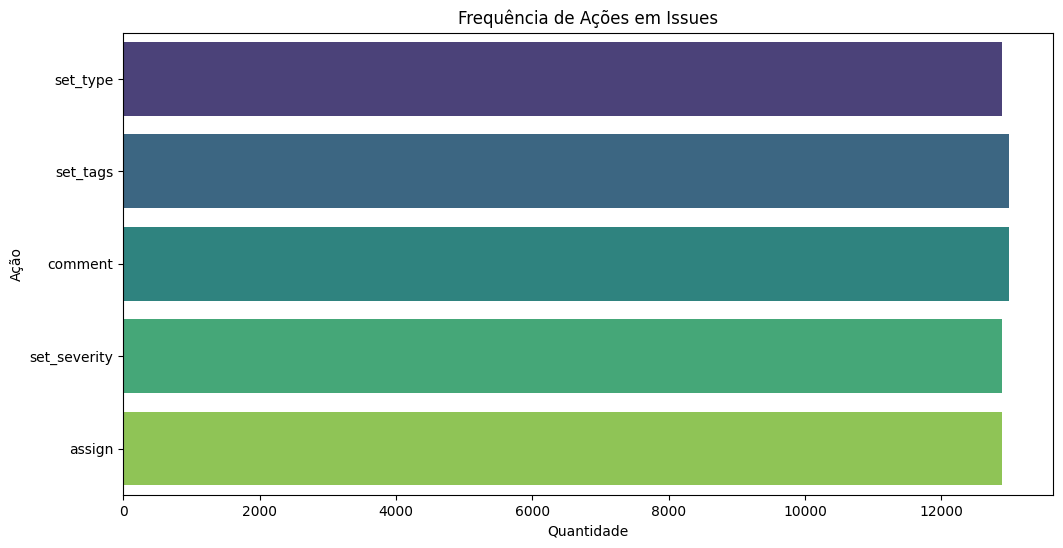

In [ ]:

actions = df['actions'].dropna().apply(eval).sum()

action_counts = Counter(actions)

action_df = pd.DataFrame(action_counts.items(), columns=['action', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='action', data=action_df, palette='viridis')
plt.title('Frequência de Ações em Issues')
plt.xlabel('Quantidade')
plt.ylabel('Ação')
plt.show()


<ipython-input-27-966865664e12>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='author', data=author_open_counts, palette='viridis')


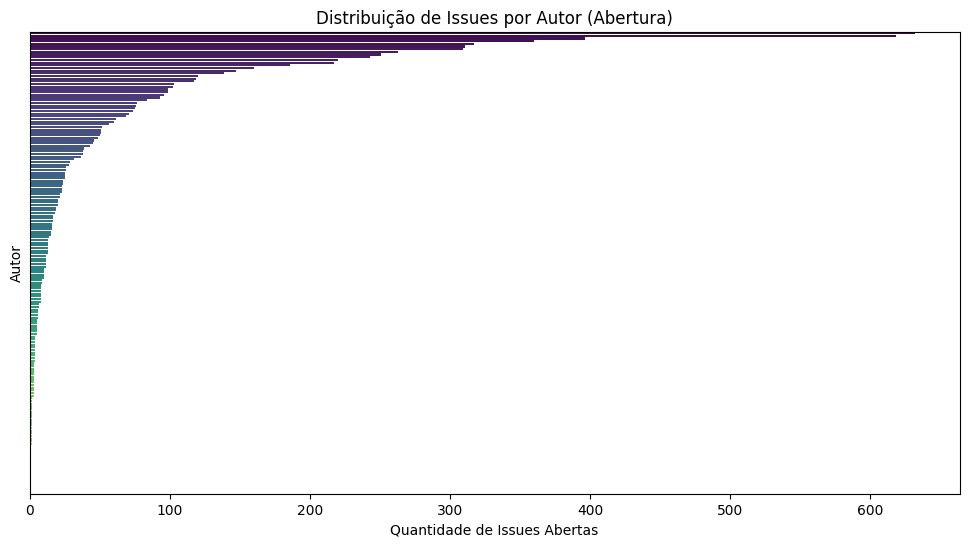

In [ ]:

author_open_counts = df['author_open'].value_counts().reset_index()
author_open_counts.columns = ['author', 'count']
author_open_counts = author_open_counts[author_open_counts['count'] < 1900]
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='author', data=author_open_counts, palette='viridis')
plt.title('Distribuição de Issues por Autor (Abertura)')
plt.xlabel('Quantidade de Issues Abertas')
plt.ylabel('Autor')

plt.yticks([])
plt.savefig("abertura.png", transparent=True)
plt.show()


<ipython-input-28-5a5f7a952364>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='author', data=author_last_counts, palette='viridis')


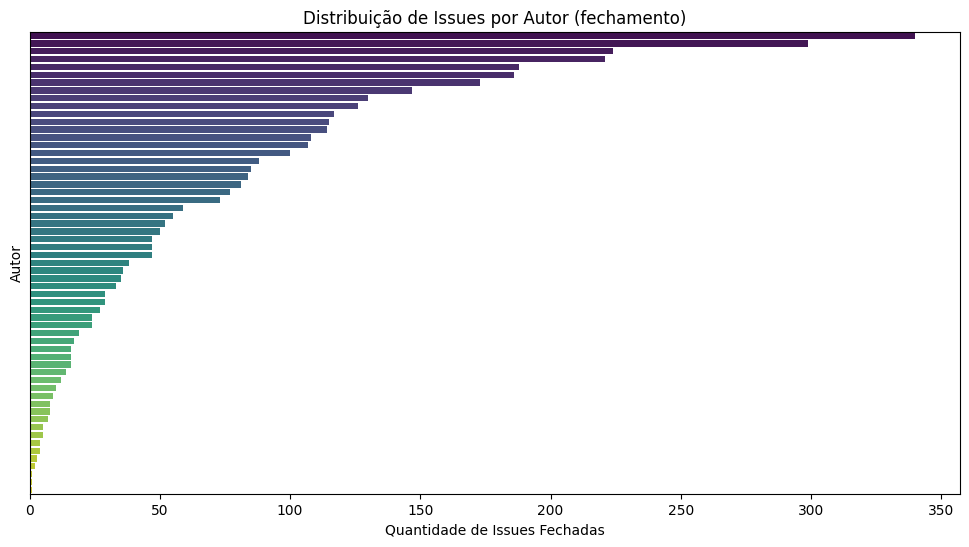

In [ ]:
author_last_counts = df['author_next_commit'].value_counts().reset_index()
author_last_counts.columns = ['author', 'count']


plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='author', data=author_last_counts, palette='viridis')
plt.title('Distribuição de Issues por Autor (fechamento)')
plt.xlabel('Quantidade de Issues Fechadas')
plt.ylabel('Autor')

# Diminuir o tamanho dos labels no eixo Y
# plt.yticks(fontsize=8)  # Ajuste o tamanho da fonte
plt.yticks([])
plt.savefig("fechamento.png", transparent=True)

plt.show()


<ipython-input-20-1bb91d447ed3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fix_duration', y='author_open', data=author_fix_duration, palette='viridis')


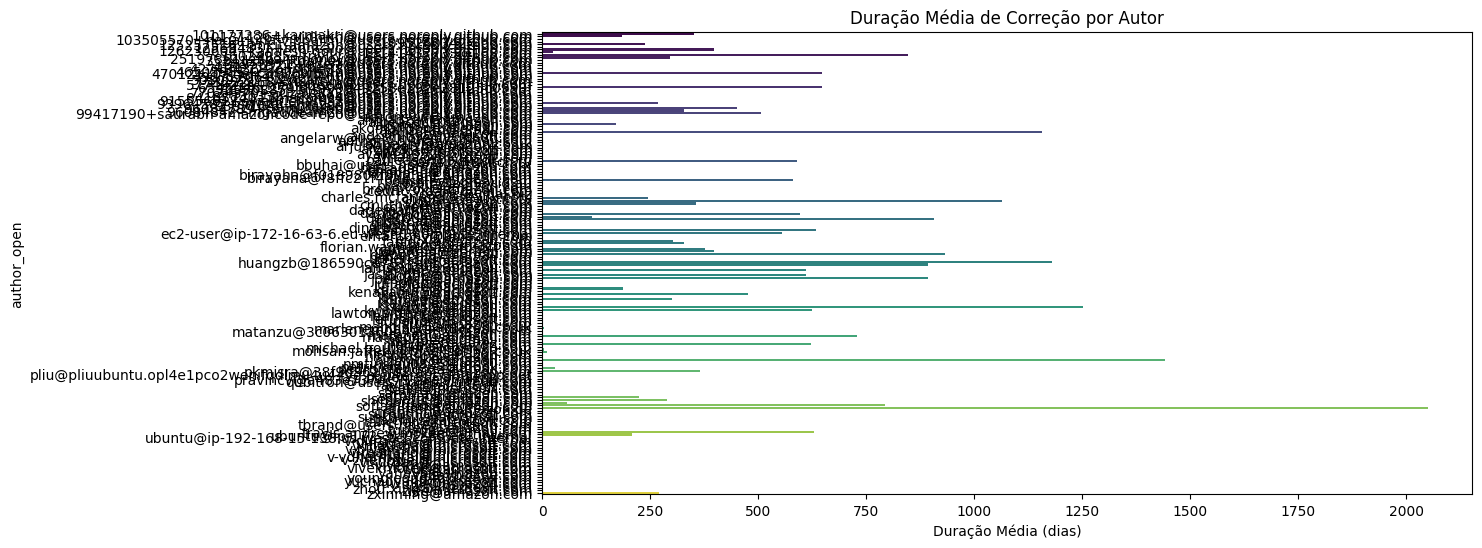

In [ ]:
author_fix_duration = df.groupby('author_open')['fix_duration'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='fix_duration', y='author_open', data=author_fix_duration, palette='viridis')
plt.title('Duração Média de Correção por Autor')
plt.xlabel('Duração Média (dias)')
plt.ylabel('Autor')
plt.show()


<ipython-input-8-9655a4491d93>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='severity', y='fix_duration', data=df_filtered, palette='muted')


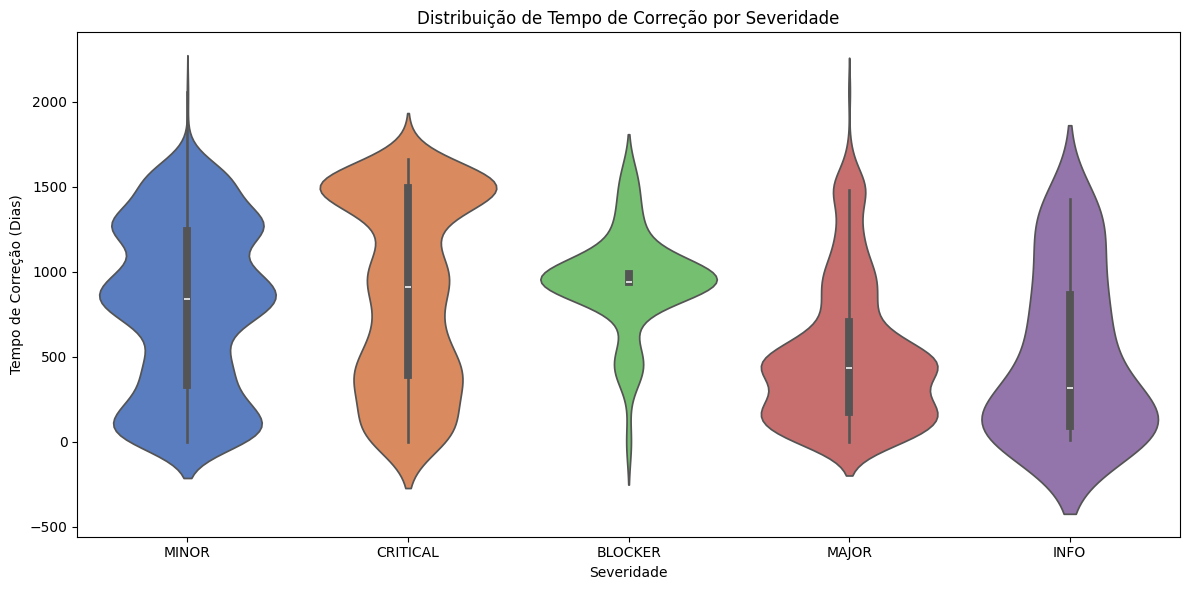

In [ ]:
df['fix_duration'] = pd.to_numeric(df['fix_duration'], errors='coerce')

df_filtered = df[ (df['severity'].notna())]

plt.figure(figsize=(12, 6))
sns.violinplot(x='severity', y='fix_duration', data=df_filtered, palette='muted')

plt.title('Distribuição de Tempo de Correção por Severidade')
plt.xlabel('Severidade')
plt.ylabel('Tempo de Correção (Dias)')

plt.tight_layout()
plt.savefig("tempo por severidade.png", transparent=True)

plt.show()

<ipython-input-12-830e6998a9cb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='severity', y='debt', data=df_filtered, palette='muted')


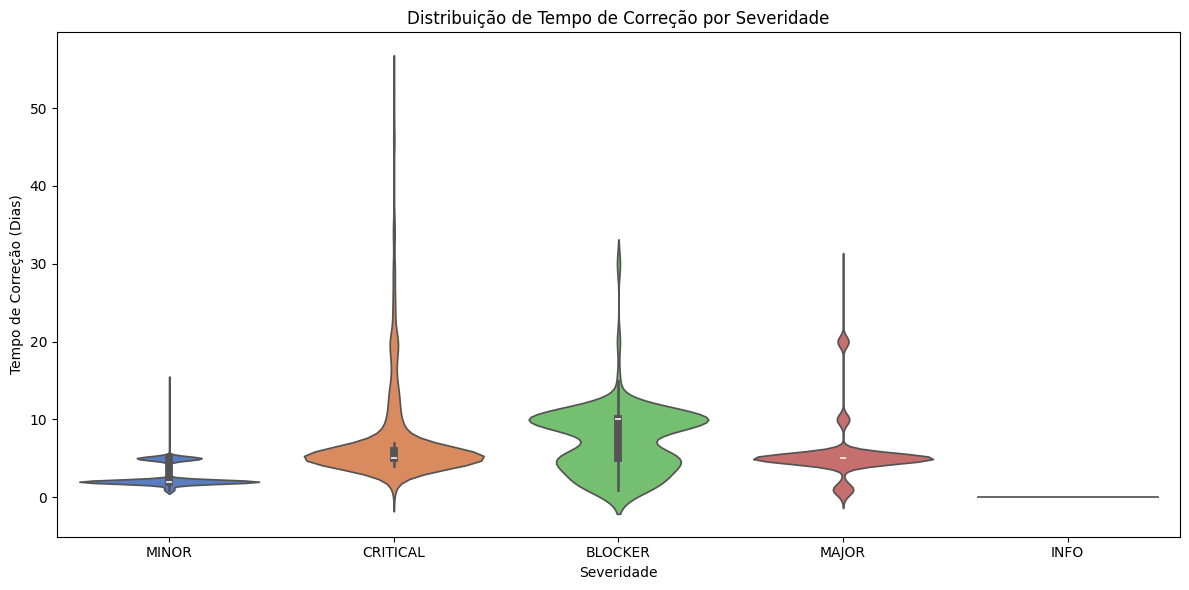

In [ ]:
df['debt'] = pd.to_numeric(df['debt'], errors='coerce')

df_filtered = df[(df['severity'].notna())]

plt.figure(figsize=(12, 6))
sns.violinplot(x='severity', y='debt', data=df_filtered, palette='muted')

plt.title('Distribuição de Tempo de Correção por Severidade')
plt.xlabel('Severidade')
plt.ylabel('Tempo de Correção (Dias)')

plt.tight_layout()

plt.show()

<ipython-input-13-830e6998a9cb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='severity', y='debt', data=df_filtered, palette='muted')


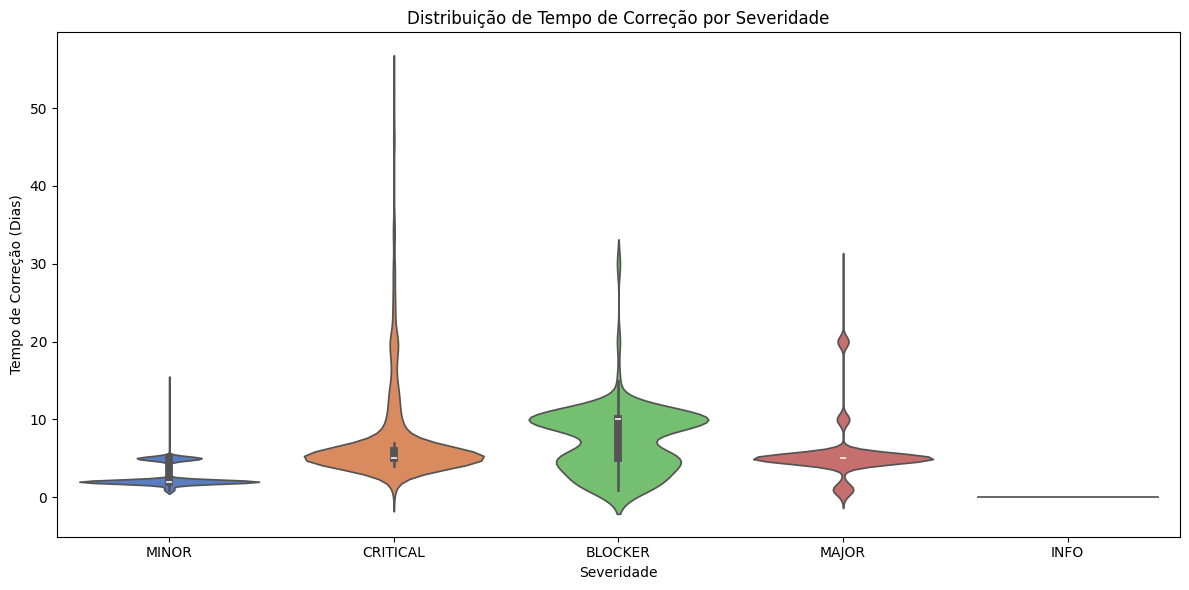

In [ ]:
df['debt'] = pd.to_numeric(df['debt'], errors='coerce')

df_filtered = df[(df['severity'].notna())]

plt.figure(figsize=(12, 6))
sns.violinplot(x='severity', y='debt', data=df_filtered, palette='muted')

plt.title('Distribuição de Tempo de Correção por Severidade')
plt.xlabel('Severidade')
plt.ylabel('Tempo de Correção (Dias)')

plt.tight_layout()

plt.show()

In [ ]:
count_equal_authors = (df['author_next_commit'] == df['author_open']).sum()
total_rows = len(df)
percentage_equal_authors = (count_equal_authors / total_rows) * 100

print(f"Número de linhas onde author_next_commit é igual a author_open: {count_equal_authors}")
print(f"Porcentagem que isso representa do total: {percentage_equal_authors:.2f}%")

Número de linhas onde author_next_commit é igual a author_open: 534
Porcentagem que isso representa do total: 4.11%


In [ ]:
df['sample'].unique()

array(['agent-openai-python-prompty', 'amazon-sagemaker-mlflow-fargate',
       'amazon-s3-multipart-upload-transfer-acceleration',
       'amazon-ivs-player-web-sample',
       'amazon-rekognition-virtual-proctor', 'amazon-rekognition-ppe',
       'amazon-location-service-pettracker-demo',
       'amazon-s3-resumable-upload', 'aws-waf-ops-dashboards',
       'aws-step-functions-progress-tracking', 'aws-sdk-js-tests',
       'aws-serverless-workshop-innovator-island',
       'aws-dataexchange-api-samples', 'aws-serverless-security-workshop',
       'aws-panorama-samples', 'azure-search-python-samples',
       'azure-load-testing-samples', 'azure-samples-python-management',
       'js-e2e-express-server', 'lambda-extensions-workshop',
       'js-e2e-web-app-easy-auth-app-to-app', 'eks-workshop-developers',
       'jp-prototyping-blog', 'communication-services-python-quickstarts',
       'MLOpsManufacturing', 'edge_diffusion_on_eks',
       'eks-multi-cluster-gitops', 'ms-identity-python

In [ ]:
df['author_next_commit'].unique()

array([nan, '46505951+cassiebreviu@users.noreply.github.com',
       'sofian.hamiti@gmail.com',
       'ec2-user@ip-172-16-63-6.eu-west-1.compute.internal',
       'akoman@amazon.com', 'bartsjb@twitch.tv', 'matteofigus@gmail.com',
       'fabiool@amazon.de', 'fabiool@amazon.com', 'dreamorosi@gmail.com',
       'ckp@amazon.com', 'huangzb@amazon.com', 'dgarcat@amazon.com',
       '25197861+alparamonov@users.noreply.github.com',
       '16024985+trivikr@users.noreply.github.com', 'jbeswick@amazon.com',
       'dblock@amazon.com', 'jbchan@amazon.com', 'cmuthapp@amazon.com',
       'awsjosh@amazon.com', 'karisury@amazon.com', 'kevhsu@amazon.com',
       'vikurpad@microsoft.com',
       '103505570+nagarjuna-vipparthi@users.noreply.github.com',
       '41597107+diberry@users.noreply.github.com',
       '84105740+jimacoms4@users.noreply.github.com',
       'sunkaihuisos@gmail.com',
       '70930885+msyyc@users.noreply.github.com', 'diberry@microsoft.com',
       'youngjeong46@gmail.com', 'tgpa

In [ ]:
author_list = [
    'akoman@amazon.com', 'bartsjb@twitch.tv', 'fabiool@amazon.de', 'fabiool@amazon.com',
    'ckp@amazon.com', 'huangzb@amazon.com', 'dgarcat@amazon.com', 'jbeswick@amazon.com',
    'dblock@amazon.com', 'jbchan@amazon.com', 'cmuthapp@amazon.com', 'awsjosh@amazon.com',
    'karisury@amazon.com', 'kevhsu@amazon.com', 'vikurpad@microsoft.com', 'diberry@microsoft.com',
    'dina.berry@microsoft.com', 'leahtuck@amazon.com', 'taichirs@amazon.co.jp',
    'v-ratann@microsoft.com', 'yahavb@amazon.com', 'mahgisla@amazon.co.uk', 'matanzu@amazon.com',
    'sumuth@microsoft.com', 'appeaty@amazon.co.uk', 'hcherian@amazon.com', 'yuwindr@amazon.com',
    'schuettc@amazon.com', 'mohsan.jaffery@blackspring.co.uk', 'brownvok@amazon.com',
    'steffeng@amazon.de', 'nizamik@amazon.com', 'kkdaws@amazon.com', 'wuc@amazon.com',
    'brettski@amazon.com'
]

# Conta as linhas onde author_next_commit está na lista de autores
count_in_list = df['author_next_commit'].isin(author_list).sum()

# Calcula a porcentagem que isso representa do total
total_rows = len(df)
total_close = len(df['author_next_commit'].dropna())
percentage_in_list = (count_in_list / total_rows) * 100
percentage_close = (count_in_list / total_close) * 100

print(f"Número de linhas onde author_next_commit está na lista: {count_in_list}")
print(f"Porcentagem que isso representa do total: {percentage_in_list:.2f}%")
print(f"Porcentagem que isso representa do total fechado: {percentage_close:.2f}%")

Número de linhas onde author_next_commit está na lista: 2561
Porcentagem que isso representa do total: 19.71%
Porcentagem que isso representa do total fechado: 64.14%


In [ ]:
df['author_next_commit']

,author_next_commit
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
12986,NaN
12987,NaN
12988,NaN
12989,NaN


In [ ]:
df_ref = pd.read_csv('refactoring_analysis_details.csv')
df_ref

,repository,sha1,type,description,leftSideLocations,rightSideLocations
0,https://github.com/aws-samples/amazon-devops-g...,f17a6db8c39918c8e87f5c79e25570c560f06b18,Inline Variable,Inline Variable jsonObject : JSONObject in met...,[{'filePath': 'Functions/src/main/java/aws/dev...,[{'filePath': 'Functions/src/main/java/aws/dev...
1,https://github.com/aws-samples/amazon-devops-g...,f17a6db8c39918c8e87f5c79e25570c560f06b18,Change Return Type,Change Return Type Incident to void in method ...,[{'filePath': 'Functions/src/main/java/aws/dev...,[{'filePath': 'Functions/src/main/java/aws/dev...
2,https://github.com/aws-samples/amazon-devops-g...,c2016008ec47647e9ca57aa9ff6b89af38e85a33,Add Parameter,Add Parameter context : Context in method priv...,[{'filePath': 'Functions/src/main/java/aws/dev...,[{'filePath': 'Functions/src/main/java/aws/dev...
3,https://github.com/aws-samples/amazon-devops-g...,c2016008ec47647e9ca57aa9ff6b89af38e85a33,Add Parameter,Add Parameter context : Context in method publ...,[{'filePath': 'Functions/src/main/java/aws/dev...,[{'filePath': 'Functions/src/main/java/aws/dev...
4,https://github.com/aws-samples/amazon-devops-g...,8ba4ca75092440a0b0013b43429d3c7d019f561c,Replace Attribute With Variable,Replace Attribute With Variable username : Str...,[{'filePath': 'Functions/src/main/java/aws/dev...,[{'filePath': 'Functions/src/main/java/aws/dev...
...,...,...,...,...,...,...
3512,https://github.com/spring-guides/tut-rest,ade3bf4bf6be7fc95e6a4d588bafcba6ac8d6cfd,Change Return Type,Change Return Type Account to Optional<Account...,[{'filePath': 'src/main/java/demo/Application....,[{'filePath': 'src/main/java/demo/Application....
3513,https://github.com/spring-guides/tut-rest,c941631315865d5a6107d3baf063db35003715f9,Inline Variable,Inline Variable bookmark : Bookmark in method ...,[{'filePath': 'src/main/java/demo/Application....,[{'filePath': 'src/main/java/demo/Application....
3514,https://github.com/spring-guides/tut-rest,c941631315865d5a6107d3baf063db35003715f9,Modify Attribute Annotation,Modify Attribute Annotation @OneToMany(cascade...,[{'filePath': 'src/main/java/demo/Application....,[{'filePath': 'src/main/java/demo/Application....
3515,https://github.com/spring-guides/tut-rest,c941631315865d5a6107d3baf063db35003715f9,Modify Attribute Annotation,Modify Attribute Annotation @ManyToOne(fetch =...,[{'filePath': 'src/main/java/demo/Application....,[{'filePath': 'src/main/java/demo/Application....


                            type  count
0        Remove Class Annotation    414
1           Add Class Annotation    225
2                     Move Class    216
3           Change Variable Type    170
4             Change Return Type    140
..                           ...    ...
77             Reorder Parameter      1
78  Replace Anonymous With Class      1
79              Extract Subclass      1
80               Merge Attribute      1
81    Remove Variable Annotation      1

[82 rows x 2 columns]


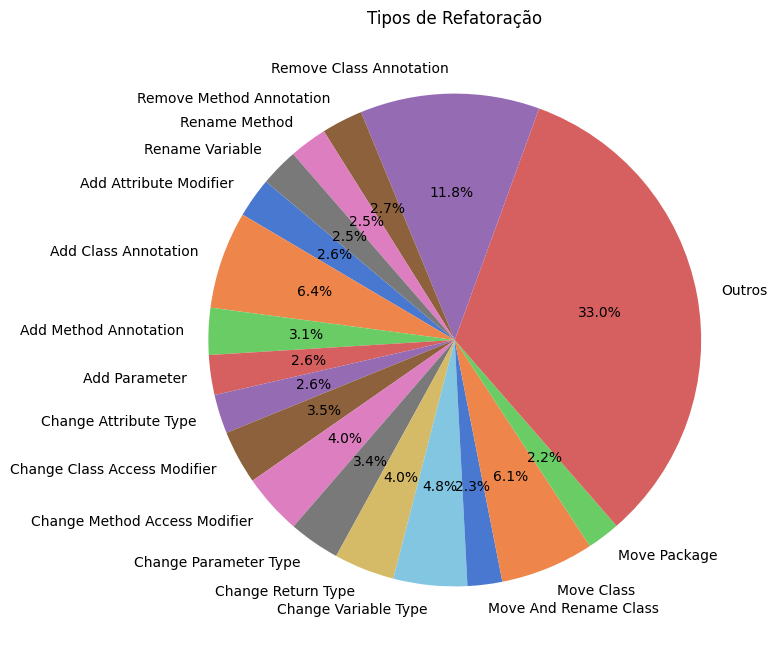

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo: dados de teste
# Calcular a soma total para encontrar as porcentagens
# total = df_ref['count'].sum()
severity_counts = df_ref['type'].value_counts().reset_index()

print(severity_counts)

# Adicionar coluna de porcentagens
severity_counts['percentage'] = (severity_counts['count'] / severity_counts['count'].sum()) * 100

# Identificar categorias menores que 2%
severity_counts['type'] = severity_counts.apply(lambda row: row['type'] if row['percentage'] >= 2 else 'Outros', axis=1)

# Agrupar a categoria "Outros"
grouped = severity_counts.groupby('type', as_index=False).agg({'count': 'sum'})

# Redesenhar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(grouped['count'], labels=grouped['type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('Tipos de Refatoração')
plt.savefig("tipo_ref.png", transparent=True)

plt.show()
